## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv('Company.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [3]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot: xlabel='Sales', ylabel='Count'>

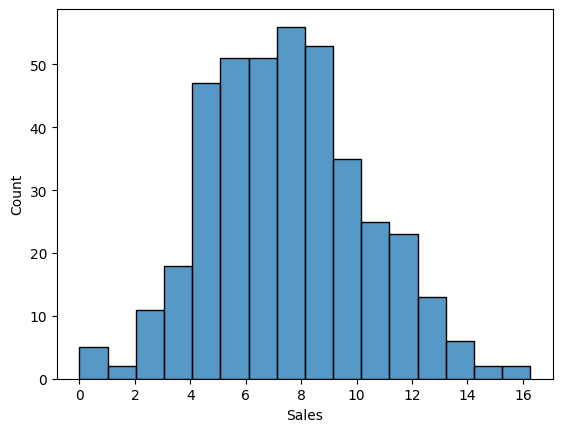

In [4]:
sns.histplot(company['Sales'])

In [6]:
company['Sales'] = [1 if x>=7.5 else 0 for x in company['Sales']]
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company = company.replace({'Yes':1,'No':0,'Bad':0,'Medium':1,'Good':2})
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,2,65,10,1,1
2,1,113,35,10,269,80,1,59,12,1,1
3,0,117,100,4,466,97,1,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [8]:
y = company.iloc[:,0]
x = company.iloc[:,1:]


In [ ]:
'''
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = pd.DataFrame(std_scaler.fit_transform(x),columns=x.columns)
x
'''

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)


In [18]:
tree_reg = DecisionTreeClassifier(criterion='entropy',max_depth=10)
tree_reg.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

### Predict the result and check accuracy with test set

In [19]:
result = tree_reg.predict(x_test)

In [20]:
pd.crosstab(y_test,result)

col_0,0,1
Sales,,
0,57,12
1,16,35


In [21]:
np.mean(result==y_test)

0.7666666666666667

### Attribute causes high sale

In [23]:
print(f"Feature importances :\n {tree_reg.feature_importances_}")

Feature importances :
 [0.07317747 0.14493654 0.15287556 0.15303075 0.26991779 0.11880119
 0.05104311 0.         0.01140839 0.02480919]


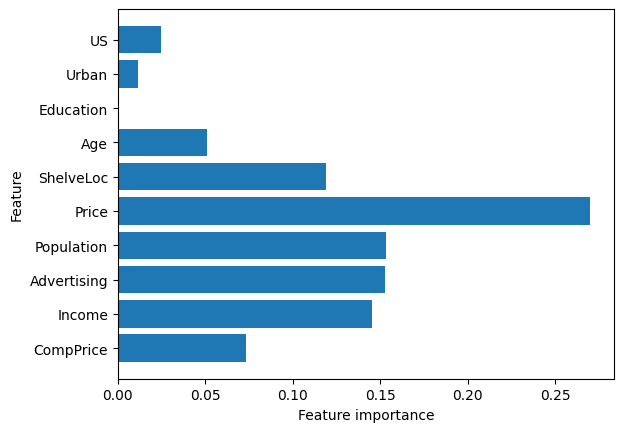

In [32]:
def plot_feature_importances(x_train,model):
	n_features = x_train.shape[1]
	plt.barh(range(n_features), model.feature_importances_, align='center')
	plt.yticks(np.arange(n_features),x_train.columns)
	plt.xlabel("Feature importance")
	plt.ylabel("Feature")

plot_feature_importances(x_test,tree_reg)